# Hazard: winter windstorms / extratropical cyclones in Europe
## Or: The StormEurope hazard subclass of CLIMADA

Auth: Jan Hartman  & Thomas Röösli  
Date: 2018-04-26 & 2020-03-03

This notebook will give a quick tour of the capabilities of the StormEurope hazard class. This includes functionalities to apply probabilistic alterations to historical storms.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

## Reading Data

StormEurope was written under the presumption that you'd start out with [WISC](https://wisc.climate.copernicus.eu/wisc/#/help/products#footprint_section) storm footprint data in netCDF format. This notebook works with a demo dataset. If you would like to work with the real data: (1) Please follow the link and download the file C3S_WISC_FOOTPRINT_NETCDF_0100.tgz from the Copernicus Windstorm Information Service, (2) unzip it (3) uncomment the last two lines in the following codeblock and (4) adjust the variable "WISC_files".

We first construct an instance and then point the reader at a directory containing compatible `.nc` files. Since there are other files in there, we must be explicit and use a globbing pattern; supplying incompatible files will make the reader fail.

The reader actually calls `climada.util.files_handler.get_file_names`, so it's also possible to hand it an explicit list of filenames, or a dirname, or even a list of glob patterns or directories. 

In [3]:
from climada.hazard import StormEurope
from climada.util.constants import WS_DEMO_NC

storm_instance = StormEurope()
storm_instance.read_footprints(WS_DEMO_NC)

# WISC_files = '/path/to/folder/C3S_WISC_FOOTPRINT_NETCDF_0100/fp_era[!er5]*_0.nc'
# storm_instance.read_footprints(WISC_files)

2020-03-05 10:29:24,582 - climada - DEBUG - Loading default config file: C:\shortpaths\GitHub\climada_python\climada\conf\defaults.conf
2020-03-05 10:29:25,946 - climada - DEBUG - Loading user config file: C:\shortpaths\GitHub\climada.conf
2020-03-05 10:29:29,788 - climada.hazard.storm_europe - INFO - Constructing centroids from C:\shortpaths\GitHub\climada_python\data\demo\fp_lothar_crop-test.nc
2020-03-05 10:29:29,821 - climada.hazard.centroids.centr - INFO - Setting geometry points.
2020-03-05 10:29:29,898 - climada.hazard.centroids.centr - DEBUG - Setting area_pixel 9944 points.
2020-03-05 10:29:31,113 - climada.hazard.centroids.centr - DEBUG - Setting on_land 9944 points.
2020-03-05 10:29:31,624 - climada.hazard.storm_europe - INFO - Commencing to iterate over netCDF files.
2020-03-05 10:29:31,723 - climada.util.checker - DEBUG - Hazard.ssi not set. 
2020-03-05 10:29:31,724 - climada.util.checker - DEBUG - Hazard.ssi_full_area not set. 
2020-03-05 10:29:31,777 - climada.util.check

## Introspection

Let's quickly see what attributes this class brings with it:

In [4]:
storm_instance?

You could also try listing all permissible methods with `dir(storm_instance)`, but since that would include the methods from the `Hazard` base class, you wouldn't know what's special. The best way is to read the source: uncomment the following statement to read more.

In [5]:
# StormEurope??

## Into the Storm Severity Index (SSI)

The SSI, according to [Dawkins et al. 2016](https://doi.org/10.5194/nhess-16-1999-2016) or [Lamb and Frydendahl, 1991](https://dx.doi.org/10.2307/215206), can be set using `set_ssi`. For demonstration purposes, I show the default arguments. (Check also the defaults using `storm_instance.calc_ssi?`, the method for which set_ssi is a wrapper.)

We won't be using the `plot_ssi` functionality just yet, because we only have two events; the graph really isn't informative. After this, we'll generate some more storms to make that plot more aesthetically pleasing.

In [6]:
storm_instance.set_ssi(
    method = 'wind_gust',
    intensity = storm_instance.intensity, 
    # the above is just a more explicit way of passing the default
    on_land = True,
    threshold = 25,
    sel_cen = None
    # None is default. sel_cen could be used to subset centroids
)

## Probabilistic Storms

This class allows generating probabilistic storms from historical ones according to a method outlined in [Schwierz et al. 2010](https://doi.org/10.1007/s10584-009-9712-1). This means that per historical event, we generate 29 new ones with altered intensities. Since it's just a bunch of vector operations, this is pretty fast. 

However, we should not return the entire probabilistic dataset in-memory: in trials, this used up 60 GB of RAM, thus requiring a great amount of swap space. Instead, we must select a country by setting the `reg_id` parameter to an ISO_N3 country code used in the [Natural Earth](http://naturalearthdata.com/) dataset. It is also possible to supply a list of ISO codes. If your machine is up for the job of handling the whole dataset, set the `reg_id` parameter to `None`.

Since assigning each centroid a country ID is a rather inefficient affair, you may need to wait a minute or two for the entire WISC dataset to be processed. For the small demo dataset, it runs pretty quickly.

2020-03-05 10:29:31,845 - climada.hazard.centroids.centr - INFO - Setting geometry points.
2020-03-05 10:29:32,248 - climada.hazard.centroids.centr - DEBUG - Setting region_id 9944 points.
2020-03-05 10:29:32,466 - climada.util.coordinates - DEBUG - Setting region_id 9944 points.
2020-03-05 10:29:33,506 - climada.hazard.storm_europe - INFO - Commencing probabilistic calculations
2020-03-05 10:29:33,620 - climada.hazard.storm_europe - INFO - Generating new StormEurope instance
2020-03-05 10:29:33,663 - climada.util.checker - DEBUG - Hazard.ssi not set. 
2020-03-05 10:29:33,664 - climada.util.checker - DEBUG - Hazard.ssi_wisc not set. 
2020-03-05 10:29:33,665 - climada.util.checker - DEBUG - Hazard.event_name not set. Default values set.


C:\shortpaths\GitHub\climada_python\climada\util\plot.py:311: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


Wall time: 2.24 s


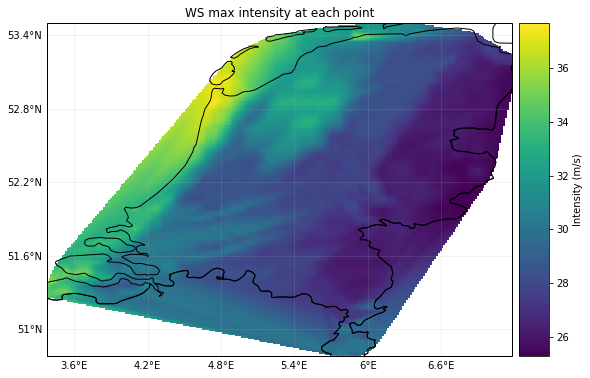

In [7]:
%%time
storm_prob = storm_instance.generate_prob_storms(reg_id=528)
storm_prob.plot_intensity(0)

We can get much more fancy in our calls to `generate_prob_storms`; the keyword arguments after `ssi_args` are passed on to `_hist2prob`, allowing us to tweak the probabilistic permutations.

In [9]:
ssi_args = {
    'on_land': True,
    'threshold': 25,
}

storm_prob_xtreme = storm_instance.generate_prob_storms(
    reg_id=[56, 528], # BEL and NLD
    spatial_shift=2,
    ssi_args=ssi_args,
    power=1.5,
    scale=0.3
)

2020-03-05 10:29:36,628 - climada.hazard.storm_europe - INFO - Commencing probabilistic calculations
2020-03-05 10:29:36,738 - climada.hazard.storm_europe - INFO - Generating new StormEurope instance
2020-03-05 10:29:36,807 - climada.util.checker - DEBUG - Hazard.ssi not set. 
2020-03-05 10:29:36,808 - climada.util.checker - DEBUG - Hazard.ssi_wisc not set. 
2020-03-05 10:29:36,808 - climada.util.checker - DEBUG - Hazard.event_name not set. Default values set.


We can now check out the SSI plots of both these calculations. The comparison between the historic and probabilistic ssi values, only makes sence for the full dataset.

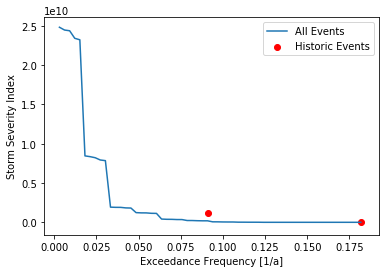

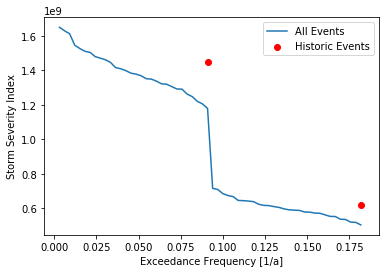

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1dafba99128>)

In [10]:
storm_prob_xtreme.plot_ssi(full_area=True)
storm_prob.plot_ssi(full_area=True)